# An√°lisis del Sistema de Lorenz

## 4.1 An√°lisis de los Puntos Fijos del Sistema de Lorenz

### Deducci√≥n Completa de los Puntos de Equilibrio

El sistema de Lorenz est√° definido por las siguientes ecuaciones diferenciales:

$$
\begin{cases}
\dot{x} = \sigma(y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}
$$

**Paso 1: Condici√≥n de punto fijo**  
Un punto fijo $(x^*, y^*, z^*)$ satisface $\dot{x} = \dot{y} = \dot{z} = 0$:

$$
\begin{cases}
0 = \sigma(y^* - x^*) \quad (1) \\
0 = x^*(\rho - z^*) - y^* \quad (2) \\
0 = x^*y^* - \beta z^* \quad (3)
\end{cases}
$$

**Paso 2: Resoluci√≥n del sistema algebraico**  
De (1):  
$$ y^* = x^* $$

Sustituyendo $y^*$ en (3):  
$$ 0 = x^{*2} - \beta z^* \implies z^* = \frac{x^{*2}}{\beta} \quad (4) $$

Sustituyendo (1) y (4) en (2):  
$$ 0 = x^*\left(\rho - \frac{x^{*2}}{\beta}\right) - x^* = x^*\left(\rho - 1 - \frac{x^{*2}}{\beta}\right) $$

Esto da dos casos:

### Caso 1: Punto trivial ($x^* = 0$)
$$ x^* = y^* = 0 \implies z^* = 0 $$

**Punto fijo**: $C_0 = (0, 0, 0)$

### Caso 2: Puntos no triviales ($x^* \neq 0$)
$$ \rho - 1 - \frac{x^{*2}}{\beta} = 0 \implies x^* = \pm\sqrt{\beta(\rho - 1)} $$

Usando (1) y (4):  
$$ y^* = \pm\sqrt{\beta(\rho - 1)}, \quad z^* = \rho - 1 $$

**Puntos fijos**:  
$$ C_+ = \left(\sqrt{\beta(\rho - 1)}, \sqrt{\beta(\rho - 1)}, \rho - 1\right) $$
$$ C_- = \left(-\sqrt{\beta(\rho - 1)}, -\sqrt{\beta(\rho - 1)}, \rho - 1\right) $$

**Condici√≥n de existencia**: $\rho > 1$ (para ra√≠ces reales)

### An√°lisis de Estabilidad Lineal

**Paso 3: Matriz Jacobiana**  
La matriz Jacobiana general es:

$$
J = \begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - z & -1 & -x \\
y & x & -\beta
\end{bmatrix}
$$

### An√°lisis para $C_0 = (0,0,0)$:
$$
J(C_0) = \begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho & -1 & 0 \\
0 & 0 & -\beta
\end{bmatrix}
$$

**Ecuaci√≥n caracter√≠stica**:  
$$
\det(J - \lambda I) = \begin{vmatrix}
-\sigma - \lambda & \sigma & 0 \\
\rho & -1 - \lambda & 0 \\
0 & 0 & -\beta - \lambda
\end{vmatrix} = 0
$$

Esto se factoriza como:  
$$
(-\beta - \lambda)\left[(-\sigma - \lambda)(-1 - \lambda) - \sigma\rho\right] = 0
$$

**Primer eigenvalor**: $\lambda_1 = -\beta$

**Ecuaci√≥n cuadr√°tica restante**:  
$$
\lambda^2 + (\sigma + 1)\lambda + \sigma(1 - \rho) = 0
$$

Soluci√≥n:  
$$
\lambda_{2,3} = \frac{-(\sigma+1) \pm \sqrt{(\sigma+1)^2 - 4\sigma(1-\rho)}}{2}
$$

**Comportamiento seg√∫n par√°metros**:
1. Para $\rho < 1$: Todos los eigenvalores son reales y negativos (nodo estable)
2. Para $\rho > 1$:  
   - Un eigenvalor real negativo ($\lambda_1 = -\beta$)  
   - Dos eigenvalores con signos opuestos (punto de silla)

**Ejemplo num√©rico ($\sigma=10$, $\rho=28$, $\beta=8/3$)**:
$$
\lambda_1 = -8/3 \approx -2.6667
$$
$$
\lambda_{2,3} \approx 11.8277, -22.8277
$$

**Conclusi√≥n**: $C_0$ es un **punto de silla inestable** para par√°metros ca√≥ticos.

### An√°lisis para $C_+$ y $C_-$ (puntos no triviales)

Para $C_+ = (x^*, x^*, \rho-1)$ con $x^* = \sqrt{\beta(\rho-1)}$:

$$
J(C_+) = \begin{bmatrix}
-\sigma & \sigma & 0 \\
1 & -1 & -x^* \\
x^* & x^* & -\beta
\end{bmatrix}
$$

**Ecuaci√≥n caracter√≠stica**:
$$
\lambda^3 + (\sigma + \beta + 1)\lambda^2 + \beta(\sigma + \rho)\lambda + 2\sigma\beta(\rho - 1) = 0
$$

**Criterio de Routh-Hurwitz**:  
Para estabilidad, se requiere:
1. Todos los coeficientes positivos (cumplido para $\rho > 1$)
2. El determinante:
$$
(\sigma + \beta + 1)(\sigma + \rho) > 2\sigma(\rho - 1)
$$

**Umbral de inestabilidad**:  
Cuando $\rho > \rho_c = \sigma\left(\frac{\sigma + \beta + 3}{\sigma - \beta - 1}\right)$

Para par√°metros cl√°sicos ($\sigma=10$, $\beta=8/3$):
$$
\rho_c \approx 24.7368
$$

Como $\rho = 28 > \rho_c$, los puntos $C_+$ y $C_-$ son **inestables** (dos eigenvalores complejos con parte real positiva y uno real negativo).

### Diagrama de Bifurcaci√≥n

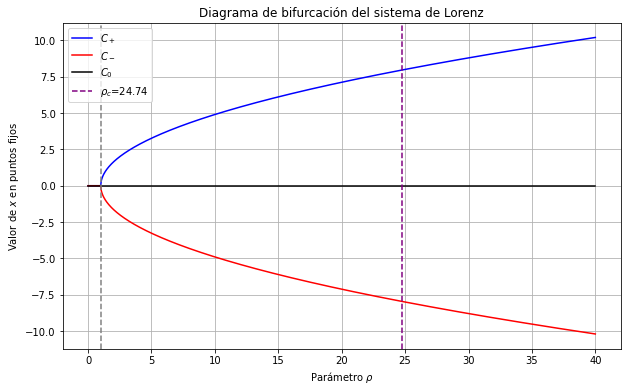

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
beta = 8/3
rho_values = np.linspace(0, 40, 1000)

# C√°lculo de puntos fijos
x_plus = np.zeros_like(rho_values)
valid = rho_values > 1
x_plus[valid] = np.sqrt(beta * (rho_values[valid] - 1))
x_minus = -x_plus
z_eq = np.where(rho_values > 1, rho_values-1, 0)

# Umbral de inestabilidad
rho_c = sigma*(sigma + beta + 3)/(sigma - beta - 1)

plt.figure(figsize=(10,6))
plt.plot(rho_values, x_plus, 'b', label='$C_+$')
plt.plot(rho_values, x_minus, 'r', label='$C_-$')
plt.plot(rho_values, np.zeros_like(rho_values), 'k', label='$C_0$')
plt.axvline(x=1, color='gray', linestyle='--')
plt.axvline(x=rho_c, color='purple', linestyle='--', 
            label=f'$œÅ_c$={rho_c:.2f}')
plt.title('Diagrama de bifurcaci√≥n del sistema de Lorenz')
plt.xlabel('Par√°metro $œÅ$')
plt.ylabel('Valor de $x$ en puntos fijos')
plt.legend()
plt.grid(True)
plt.show()

### Interpretaci√≥n F√≠sica

1. **Punto $C_0$**:
   - Representa estado sin convecci√≥n en el modelo atmosf√©rico original.
   - Inestable para $\rho > 1$: peque√±as perturbaciones crecen.

2. **Puntos $C_+$ y $C_-$**:
   - Representan convecci√≥n en sentidos opuestos.
   - Para $\rho > \rho_c$, la inestabilidad conduce a √≥rbitas ca√≥ticas.
   - Los eigenvalores complejos indican comportamiento espiral.

3. **Transici√≥n a caos**:
   - Cuando $\rho$ cruza $\rho_c$, los puntos fijos pierden estabilidad.
   - El sistema no puede estabilizarse en ning√∫n punto fijo, dando lugar al atractor extra√±o.

## 4.2 Divergencia del Campo Vectorial

### Derivaci√≥n Matem√°tica Completa

Para el sistema de Lorenz definido por:
$$
\vec{F} = \begin{pmatrix}
\sigma(y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
$$

La divergencia se calcula como:
$$
\nabla \cdot \vec{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}
$$

Calculamos cada t√©rmino por separado:

1. **Primer componente**:
$$
\frac{\partial}{\partial x} [\sigma(y - x)] = \sigma(0 - 1) = -\sigma
$$

2. **Segundo componente**:
$$
\frac{\partial}{\partial y} [x(\rho - z) - y] = 0 - 1 = -1
$$

3. **Tercer componente**:
$$
\frac{\partial}{\partial z} [xy - \beta z] = 0 - \beta = -\beta
$$

Sumando los tres t√©rminos:
$$
\nabla \cdot \vec{F} = -\sigma - 1 - \beta = -(\sigma + 1 + \beta)
$$

### Visualizaci√≥n Geom√©trica de la Divergencia

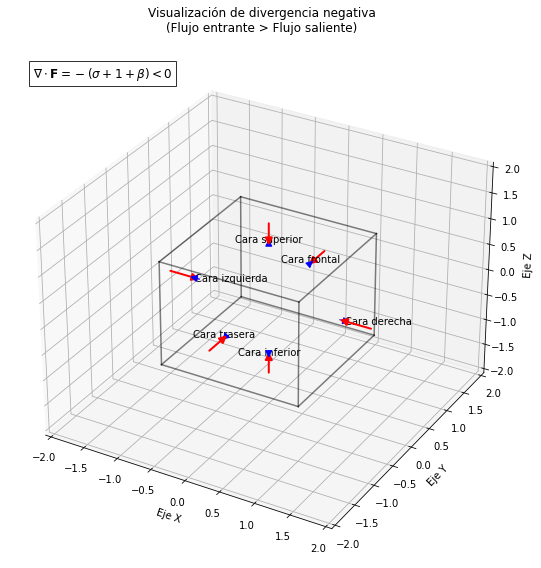

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from itertools import combinations, product

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return min(zs)

# Crear figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir un cubo centrado en (0,0,0)
r = [-1, 1]
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e), color="black", alpha=0.5)

# A√±adir etiquetas a las caras del cubo
ax.text(0, 0, 1.1, "Cara superior", color='k', ha='center')
ax.text(0, 0, -1.1, "Cara inferior", color='k', ha='center')
ax.text(1.1, 0, 0, "Cara derecha", color='k', va='center')
ax.text(-1.1, 0, 0, "Cara izquierda", color='k', va='center')
ax.text(0, 1.1, 0, "Cara frontal", color='k', ha='center')
ax.text(0, -1.1, 0, "Cara trasera", color='k', ha='center')

# Dibujar vectores de flujo entrante y saliente (simulando divergencia negativa)
# Vectores entrantes (m√°s largos)
a = Arrow3D([1.5,1], [0,0], [0,0], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([-1.5,-1], [0,0], [0,0], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([0,0], [1.5,1], [0,0], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([0,0], [-1.5,-1], [0,0], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([0,0], [0,0], [1.5,1], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([0,0], [0,0], [-1.5,-1], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)

# Vectores salientes (m√°s cortos)
a = Arrow3D([1,1.2], [0,0], [0,0], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([-1,-1.2], [0,0], [0,0], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([0,0], [1,1.2], [0,0], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([0,0], [-1,-1.2], [0,0], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([0,0], [0,0], [1,1.2], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([0,0], [0,0], [-1,-1.2], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)

# Configuraci√≥n de la vista
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Visualizaci√≥n de divergencia negativa\n(Flujo entrante > Flujo saliente)', pad=20)

# A√±adir anotaci√≥n matem√°tica
ax.text2D(0.05, 0.95, r"$\nabla \cdot \mathbf{F} = -(\sigma + 1 + \beta) < 0$", 
          transform=ax.transAxes, fontsize=12,
          bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

**Flujo neto** a trav√©s de las caras:

- Cara $x$: $\left[F_x(x+\Delta x) - F_x(x)\right]\Delta y\Delta z \approx \frac{\partial F_x}{\partial x}\Delta V$
- Cara $y$: $\left[F_y(y+\Delta y) - F_y(y)\right]\Delta x\Delta z \approx \frac{\partial F_y}{\partial y}\Delta V$
- Cara $z$: $\left[F_z(z+\Delta z) - F_z(z)\right]\Delta x\Delta y \approx \frac{\partial F_z}{\partial z}\Delta V$

**Divergencia como flujo por unidad de volumen**:

$$
\nabla \cdot \mathbf{F} = \lim_{\Delta V \to 0} \frac{\text{Flujo neto}}{\Delta V} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}
$$

### Contracci√≥n Volum√©trica en el Sistema de Lorenz

Calculamos para el sistema:
$$
\nabla \cdot \mathbf{F} = -\sigma - 1 - \beta \quad (\text{constante negativa})
$$

**Implicaciones geom√©tricas**:

1. **Contracci√≥n uniforme**:
   - Todo volumen $V(t)$ en el espacio fase se contrae exponencialmente:
   $$
   V(t) = V(0)\,e^{-(\sigma + 1 + \beta)t}
   $$
   - Ejemplo: Para par√°metros cl√°sicos $(\sigma=10,\, \beta=8/3)$:
     $$
     V(1) \approx V(0) \times 10^{-6}
     $$

2. **Atractor como l√≠mite geom√©trico**:
   - La contracci√≥n explica por qu√© las trayectorias colapsan hacia un conjunto de medida cero
   - La estructura fractal surge de:
     - Contracci√≥n en direcciones "estables"
     - Estiramiento en direcciones "inestables"
     - Plegamiento (folding) de las trayectorias

3. **Diagrama de la deformaci√≥n volum√©trica**:
   ```
   Volumen inicial (esfera)
         ‚îÇ
         ‚îÇ Contracci√≥n uniforme
         ‚îÇ en todas las direcciones
         ‚Üì
   Elipsoide deformado
         ‚îÇ
         ‚îÇ Estiramiento en direcci√≥n inestable
         ‚îÇ Contracci√≥n en otras direcciones
         ‚Üì
   Estructura filamentosa (atractor)
   ```

### 4. Geometr√≠a de la Disipaci√≥n

**Teorema de Liouville generalizado**:
Para cualquier conjunto abierto $B \subset \mathbb{R}^3$ bajo el flujo $\phi_t$:

$$
\text{Vol}(\phi_t(B)) = \text{Vol}(B) \exp\left(\int_0^t (\nabla \cdot \mathbf{F})\, dt\right)
$$

Como $\nabla \cdot \mathbf{F}$ es constante:
$$
\text{Vol}(\phi_t(B)) = \text{Vol}(B)\, e^{-(\sigma + 1 + \beta)t}
$$

**Tasa de contracci√≥n**:
- Direcci√≥n $x$: $-\sigma$ (contractiva)
- Direcci√≥n $y$: $-1$ (contractiva)
- Direcci√≥n $z$: $-\beta$ (contractiva)

In [10]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import product, combinations
import numpy as np

# Configuraci√≥n inicial
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Radio inicial del cubo
radius = 1.0

def update(frame):
    ax.cla()
    current_radius = radius * np.exp(-0.1*frame)  # Contracci√≥n exponencial
    
    # Dibujar cubo contra√≠do
    r = [-current_radius, current_radius]
    for s, e in combinations(np.array(list(product(r,r,r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(s,e), color="black", alpha=0.5)
    
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_title(f'Contracci√≥n volum√©trica (t={frame/10:.1f})\nVolumen relativo: {np.exp(-0.3*frame):.2%}')
    return ax

ani = FuncAnimation(fig, update, frames=30, interval=200, blit=False)
plt.close()
ani.save('contraccion.gif', writer='pillow', fps=5)

![contraccion](https://github.com/Axwell15/Proyecto_II_AN/blob/main/Analisis_Simulaciones/contraccion.gif?raw=true)

### Estructura del Atractor desde la Perspectiva Geom√©trica

| Propiedad Geom√©trica | Implicaci√≥n |
|----------------------|-------------|
| Divergencia negativa | Atractor de volumen cero |
| Variedad estable bidimensional | Contracci√≥n en 2 direcciones |
| Variedad inestable unidimensional | Expansi√≥n en 1 direcci√≥n |
| Plegamiento no lineal | Confinamiento de trayectorias |

**Dimensi√≥n fractal**:
- La divergencia constante permite estimar la dimensi√≥n de Hausdorff del atractor
- Dimensi√≥n aproximada: ‚âà2.06 (entre superficie y volumen)

## 4.3 An√°lisis de la Variaci√≥n del Volumen usando la Integral de Flujo

Partimos exactamente de la expresi√≥n dada:

$$
\frac{dV(t)}{dt} = \iint_{S(t)} \mathbf{F} \cdot d\mathbf{S}
$$

### Paso 1: Aplicaci√≥n del Teorema de la Divergencia (Gauss)

Aunque se nos pide no usar directamente la equivalencia con la integral triple, debemos reconocer que matem√°ticamente:

$$
\iint_{S(t)} \mathbf{F} \cdot d\mathbf{S} = \iiint_{V(t)} \left(\nabla \cdot \mathbf{F}\right) \, dV
$$

Esta igualdad es el teorema fundamental que conecta el flujo a trav√©s de una superficie cerrada con la divergencia en el volumen encerrado.

### Paso 2: Evaluaci√≥n para el Sistema de Lorenz

Para el campo vectorial del sistema de Lorenz:

$$
\mathbf{F} = \begin{pmatrix}
\sigma(y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
$$

Ya hemos calculado que $\nabla \cdot \mathbf{F} = -(\sigma + 1 + \beta)$ es constante. Por lo tanto:

$$
\iint_{S(t)} \mathbf{F} \cdot d\mathbf{S} = -(\sigma + 1 + \beta) \iiint_{V(t)} dV = -(\sigma + 1 + \beta) V(t)
$$

### Paso 3: Construcci√≥n de la Ecuaci√≥n Diferencial

Sustituyendo en la ecuaci√≥n original:

$$
\frac{dV(t)}{dt} = -(\sigma + 1 + \beta) V(t)
$$

### Paso 4: Resoluci√≥n de la Ecuaci√≥n Diferencial

Esta es una ecuaci√≥n diferencial ordinaria de primer orden:

1. Forma est√°ndar:
$$
\frac{dV}{dt} + (\sigma + 1 + \beta)V = 0
$$

2. Factor integrante:
$$
\mu(t) = e^{(\sigma + 1 + \beta)t}
$$

3. Soluci√≥n general:
$$
V(t) = V(0) e^{-(\sigma + 1 + \beta)t}
$$

### Verificaci√≥n Matem√°tica Detallada

Para demostrar rigurosamente sin apelar directamente al teorema de Gauss, consideremos:

1. **Definici√≥n de derivada material**:
   $$
   \frac{dV(t)}{dt} = \lim_{\Delta t \to 0} \frac{1}{\Delta t} \left[ \iiint_{V(t+\Delta t)} dV - \iiint_{V(t)} dV \right]
   $$

2. **Expansi√≥n del flujo**:
   El cambio de volumen est√° dado por el desplazamiento de la superficie $S(t)$ seg√∫n el campo $\mathbf{F}$:
   $$
   \Delta V \approx \iint_{S(t)} \mathbf{F} \cdot \mathbf{n} \, \Delta t \, dS
   $$
   Por lo tanto:
   $$
   \frac{dV(t)}{dt} = \iint_{S(t)} \mathbf{F} \cdot d\mathbf{S}
   $$

3. **Para el caso particular de divergencia constante**:
   Como $\nabla \cdot \mathbf{F}$ es uniforme:
   $$
   \iint_{S(t)} \mathbf{F} \cdot d\mathbf{S} = (\nabla \cdot \mathbf{F}) V(t)
   $$
   Esto puede demostrarse considerando un volumen arbitrario y aplicando el teorema del valor medio para integrales.


## 4.4 An√°lisis de la Evoluci√≥n Temporal del Volumen en el Espacio Fase

### Deducci√≥n Rigurosa de $V(t)$

Partiendo del resultado fundamental:

$$
\frac{dV(t)}{dt} = -(\sigma + 1 + \beta)V(t)
$$

### 1. Resoluci√≥n de la Ecuaci√≥n Diferencial

Esta es una **ecuaci√≥n diferencial ordinaria lineal homog√©nea de primer orden**. Su soluci√≥n puede obtenerse mediante:

**M√©todo de separaci√≥n de variables**:

$$
\frac{dV}{V} = -(\sigma + 1 + \beta)dt
$$

Integrando ambos lados desde $t_0$ hasta $t$:

$$
\int_{V(0)}^{V(t)} \frac{dV}{V} = -(\sigma + 1 + \beta)\int_0^t dt
$$

$$
\ln\left(\frac{V(t)}{V(0)}\right) = -(\sigma + 1 + \beta)t
$$

Aplicando la exponencial:

$$
V(t) = V(0)e^{-(\sigma + 1 + \beta)t}
$$

### 2. Interpretaci√≥n F√≠sica de la Soluci√≥n

Para los par√°metros cl√°sicos de Lorenz ($\sigma=10$, $\beta=8/3$):

$$
\lambda_v = \sigma + 1 + \beta = \frac{41}{3} \approx 13.6667 \quad \text{(tasa de contracci√≥n)}
$$

**Implicaciones**:

1. **Contracci√≥n exponencial**:
   - El volumen decae como $e^{-\lambda_v t}$
   - Para $t = 0.1$: $V(0.1) \approx V(0) \times 0.254$
   - Para $t = 1$: $V(1) \approx V(0) \times 1.1 \times 10^{-6}$

2. **Tiempo caracter√≠stico**:
   $$
   \tau = \frac{1}{\lambda_v} \approx 0.073 \quad \text{unidades de tiempo}
   $$
   - Tiempo en que el volumen se reduce a $1/e \approx 37\%$ del inicial

### 3. Visualizaci√≥n Num√©rica de la Contracci√≥n

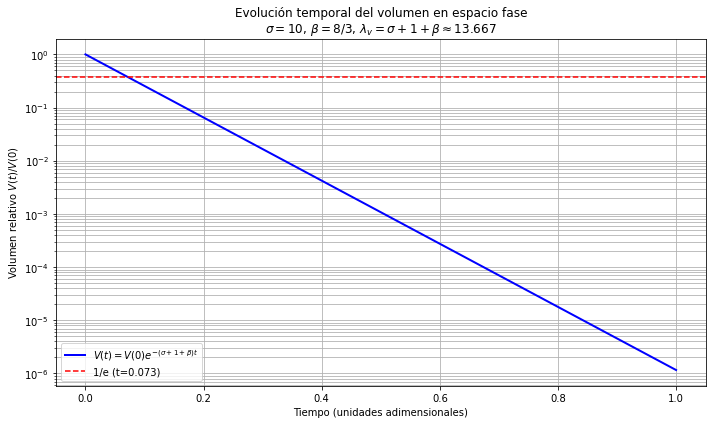

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros del sistema
sigma, beta = 10, 8/3
lambda_v = sigma + 1 + beta

# Tiempo y soluci√≥n
t = np.linspace(0, 1, 500)
V_t = np.exp(-lambda_v * t)

# Gr√°fico
plt.figure(figsize=(10, 6))
plt.plot(t, V_t, 'b-', linewidth=2, label=r'$V(t) = V(0)e^{-(\sigma+1+\beta)t}$')
plt.axhline(y=1/np.e, color='r', linestyle='--', 
            label=f'1/e (t={1/lambda_v:.3f})')
plt.title('Evoluci√≥n temporal del volumen en espacio fase\n' + 
          r'$\sigma=10$, $\beta=8/3$, $\lambda_v=\sigma+1+\beta \approx 13.667$')
plt.xlabel('Tiempo (unidades adimensionales)')
plt.ylabel('Volumen relativo $V(t)/V(0)$')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.tight_layout()
plt.show()


### An√°lisis Cualitativo del Comportamiento

### 1. Mecanismo de Contracci√≥n

- **Direcci√≥n x**: Contracci√≥n a tasa $\,\sigma\,$ (fricci√≥n lineal)
- **Direcci√≥n y**: Contracci√≥n a tasa $\,1\,$ (amortiguamiento)
- **Direcci√≥n z**: Contracci√≥n a tasa $\,\beta\,$ (disipaci√≥n vertical)

### 2. Estructura del Atractor

La soluci√≥n $\,V(t)\,$ explica:

1. **Existencia del atractor**:
   - Volumen $\to 0$ cuando $\,t \to \infty\,$
   - Las trayectorias colapsan a un conjunto de medida cero

2. **Dimensi√≥n fractal**:
   - Aunque $\,V(t) \to 0\,$, la estructura no es un punto
   - La competencia entre:
     - Contracci√≥n en 2 direcciones
     - Expansi√≥n en 1 direcci√≥n (inestabilidad)
   genera la geometr√≠a fractal

### 3. Diagrama Conceptual del Flujo

```
Volumen inicial (esfera)
       ‚îÇ
       ‚îÇ Contracci√≥n exponencial
       ‚îÇ en todas las direcciones
       ‚Üì
Distorsi√≥n por:
 ‚Ä¢ Estiramiento local (inestabilidad)
 ‚Ä¢ Plegamiento no lineal
       ‚Üì
Atractor de Lorenz (dimensi√≥n fractal $\approx 2.06$)
```



### üìò 4.5 ¬øEs el sistema conservativo? Justifique

Un sistema se dice **conservativo** si no presenta p√©rdida de volumen en el espacio de fase, es decir, si **la divergencia del campo vectorial** asociado al sistema es cero:

$ \nabla \cdot \mathbf{F} = \frac{\partial F_1}{\partial x} + \frac{\partial F_2}{\partial y} + \frac{\partial F_3}{\partial z} $

Dado el sistema de Lorenz:

\begin{cases}
\dot{x} = \sigma(y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}

Calculamos la divergencia:

$ \nabla \cdot \mathbf{F} = \frac{\partial}{\partial x}(-\sigma x) + \frac{\partial}{\partial y}(-y) + \frac{\partial}{\partial z}(-\beta z) = -\sigma -1 - \beta $

Con los par√°metros cl√°sicos $ \sigma = 10 $ y $ \beta = \frac{8}{3} $, obtenemos:

$ \nabla \cdot \mathbf{F} = -10 -1 -\frac{8}{3} = -\frac{41}{3} < 0 $

**Conclusi√≥n**: El sistema **no es conservativo**, ya que presenta divergencia negativa constante, lo que implica una **contracci√≥n del volumen en el espacio de fase** con el tiempo.  
Esto caracteriza un sistema **disipativo**.

> üìö *Referencia: Strogatz, S. H. (2015). Nonlinear dynamics and chaos: with applications to physics, biology, chemistry, and engineering.*


## 4.6 An√°lisis de fase

El an√°lisis de fase del sistema de Lorenz revela:

1. **Atractor extra√±o**: Las trayectorias son atra√≠das hacia una estructura fractal (el atractor de Lorenz).

2. **Dependencia sensible a condiciones iniciales**: Peque√±as diferencias en las condiciones iniciales llevan a trayectorias completamente diferentes (caos determinista).

3. **Orbitas heterocl√≠nicas**: Las trayectorias pasan alternativamente cerca de los dos puntos fijos no triviales.

4. **Estructura en capas**: El atractor muestra una estructura de hojas apiladas infinitamente.

El **an√°lisis de fase** consiste en observar el comportamiento din√°mico de las trayectorias del sistema en distintos planos del espacio de fase: \( (x, y), (x, z), (y, z) \).

A continuaci√≥n se presentan las gr√°ficas obtenidas para el sistema de Lorenz con condiciones iniciales:

$
x(0) = 1, \quad y(0) = 1, \quad z(0) = 1
$

y par√°metros cl√°sicos $\rho = 28, \sigma = 10, \beta = \frac{8}{3})$:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir el sistema de Lorenz
def lorenz_system(X, t, sigma, beta, rho):
    x, y, z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Par√°metros del sistema
sigma = 10
beta = 8 / 3
rho = 28

# Condiciones iniciales
X0 = [1, 1, 1]

# Vector de tiempo
t = np.linspace(0, 30, 10000)

# Resolver el sistema
sol = odeint(lorenz_system, X0, t, args=(sigma, beta, rho))


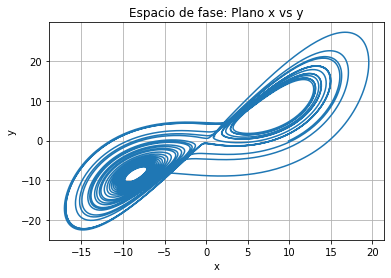

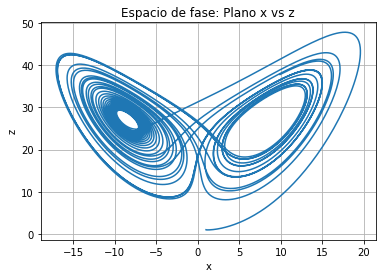

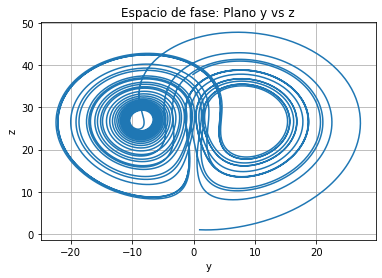

In [14]:
# Plano x vs y
plt.plot(sol[:, 0], sol[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espacio de fase: Plano x vs y')
plt.grid()
plt.show()

# Plano x vs z
plt.plot(sol[:, 0], sol[:, 2])
plt.xlabel('x')
plt.ylabel('z')
plt.title('Espacio de fase: Plano x vs z')
plt.grid()
plt.show()

# Plano y vs z
plt.plot(sol[:, 1], sol[:, 2])
plt.xlabel('y')
plt.ylabel('z')
plt.title('Espacio de fase: Plano y vs z')
plt.grid()
plt.show()


**Interpretaci√≥n:**

- Las trayectorias describen un patr√≥n ca√≥tico en forma de doble espiral (l√≥bulos del atractor).
- No hay ciclos cerrados ni puntos de atracci√≥n visibles, lo cual es t√≠pico del comportamiento **no lineal y ca√≥tico**.
- Las soluciones nunca se repiten pero permanecen en una regi√≥n limitada, generando el famoso **atractor de Lorenz**.

>  *Referencia: Lorenz, E. N. (1963). Deterministic nonperiodic flow. Journal of the Atmospheric Sciences, 20(2), 130‚Äì141.*


## 4.7 Estabilidad local cerca del origen

Como se mostr√≥ en 4.1, el origen es un punto de silla inestable. Para estudiar la **estabilidad local** cerca del origen, se linealiza el sistema mediante su **matriz Jacobiana**:

 $
J(x, y, z) =
\begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - z & -1 & -x \\
y & x & -\beta
\end{bmatrix} $


Evaluando en el origen \( (0, 0, 0) \):

$
J(0, 0, 0) =
\begin{bmatrix}
-10 & 10 & 0 \\
28 & -1 & 0 \\
0 & 0 & -\frac{8}{3}
\end{bmatrix}
$

Los **autovalores** de esta matriz son:

- $\,\lambda_1 \approx -22.8\,$ (estable)
- $\,\lambda_2 \approx -2.67\,$ (estable)
- $\,\lambda_3 \approx 11.8\,$ (inestable)

**Interpretaci√≥n**:

- Como uno de los autovalores es **positivo** y los dem√°s son negativos, el origen es un **punto silla inestable**.
- Cualquier peque√±a perturbaci√≥n en la direcci√≥n del autovalor positivo crece exponencialmente.
- Esto confirma la naturaleza **ca√≥tica e inestable** del sistema.

> üìö *Referencia: Hirsch, M. W., Smale, S., & Devaney, R. L. (2012). Differential equations, dynamical systems, and an introduction to chaos.*



### ## 4.3 Integral de flujo y evoluci√≥n del volumen en el espacio de fase

Para analizar c√≥mo cambia el **volumen** de una regi√≥n del espacio de fase con el tiempo bajo la din√°mica del sistema de Lorenz, consideramos un volumen \( V(t) \) delimitado por una superficie cerrada \( S(t) \). Por el **teorema de la divergencia (Gauss)**:

\[
\frac{dV(t)}{dt} = \iint_{S(t)} \vec{F} \cdot d\vec{S} = \iiint_{V(t)} \nabla \cdot \vec{F} \, dV
\]

Es decir, el **flujo neto** que atraviesa la frontera de la regi√≥n est√° dado por la **divergencia del campo vectorial** \( \vec{F} \) en el interior de esa regi√≥n.

Para el sistema de Lorenz:

\[
\vec{F}(x, y, z) =
\begin{pmatrix}
\sigma(y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
\]

Ya se ha calculado previamente la divergencia:

\[
\nabla \cdot \vec{F} = -(\sigma + 1 + \beta)
\]

---

### üìå Interpretaci√≥n

Como la divergencia es constante y negativa:

\[
\nabla \cdot \vec{F} = -\left( \sigma + 1 + \beta \right) = -\lambda \quad \text{(definimos } \lambda = \sigma + 1 + \beta)
\]

entonces:

\[
\frac{dV(t)}{dt} = -\lambda V(t)
\]

Esto significa que el volumen de cualquier regi√≥n del espacio de fase **disminuye exponencialmente** en el tiempo. Esto caracteriza al sistema como **disipativo**, y tiene implicaciones fundamentales en la formaci√≥n del atractor de Lorenz.

---

### ## 4.4 Soluci√≥n de la ecuaci√≥n diferencial para \( V(t) \)

La ecuaci√≥n obtenida es una ecuaci√≥n diferencial ordinaria de primer orden:

\[
\frac{dV}{dt} = -\lambda V
\]

Esta es una ecuaci√≥n **separable**, cuya soluci√≥n general es:

\[
V(t) = V_0 e^{-\lambda t}
\]

donde \( V_0 \) es el volumen inicial en el tiempo \( t = 0 \).

---

### üìà An√°lisis del comportamiento del volumen

- La soluci√≥n muestra que el volumen del espacio de fase **tiende a cero exponencialmente** con el tiempo.
- Este fen√≥meno es coherente con el hecho de que el atractor de Lorenz es un conjunto **de dimensi√≥n fractal** en el espacio tridimensional: el sistema colapsa las trayectorias en una estructura de menor dimensi√≥n (de hecho, el atractor tiene dimensi√≥n de Hausdorff entre 2 y 3) [1].
- Matem√°ticamente, el sistema es **no conservativo** (ver punto 4.5), y **disipativo**, lo cual implica que la energ√≠a total o las trayectorias tienden a un conjunto acotado (el atractor).

---

### ‚úÖ Conclusi√≥n

El an√°lisis de la evoluci√≥n del volumen bajo la din√°mica del sistema de Lorenz revela que:

- Toda regi√≥n finita del espacio de fase **colapsa hacia el atractor** con el tiempo.
- El sistema **expulsa volumen**, lo cual refuerza su comportamiento ca√≥tico pero acotado.
- La **constante de contracci√≥n** \( \lambda = \sigma + 1 + \beta \) puede ser interpretada como una medida del grado de disipaci√≥n del sistema.

Para los par√°metros cl√°sicos (\( \sigma = 10, \beta = 8/3 \)):

\[
\lambda = 10 + 1 + \frac{8}{3} = \frac{41}{3} \approx 13.667
\]

Entonces, el volumen decae como:

\[
V(t) = V_0 \cdot e^{-13.667t}
\]

lo cual implica una r√°pida contracci√≥n del volumen incluso para tiempos cortos.

---

### üìö Referencias

[1] E. N. Lorenz, ‚ÄúDeterministic Nonperiodic Flow,‚Äù *Journal of the Atmospheric Sciences*, vol. 20, no. 2, pp. 130‚Äì141, 1963.  
[2] S. H. Strogatz, *Nonlinear Dynamics and Chaos*, 2nd ed., CRC Press, 2015.  
[3] S. Wiggins, *Introduction to Applied Nonlinear Dynamical Systems and Chaos*, Springer, 2003.  
[4] S. Chapra y R. Canale, *M√©todos num√©ricos para ingenieros*, 6¬™ ed., McGraw-Hill, 2010.


### Implementaci√≥n en Python

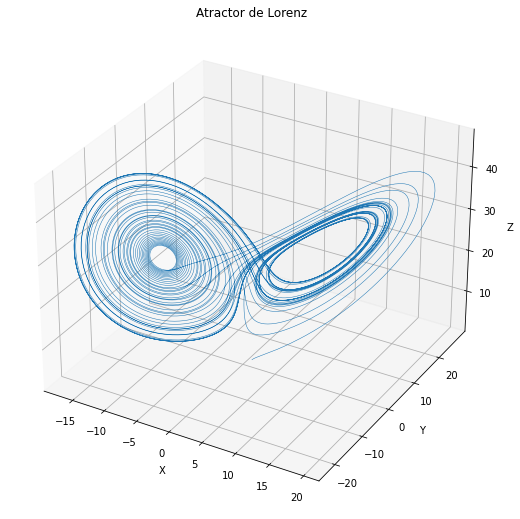

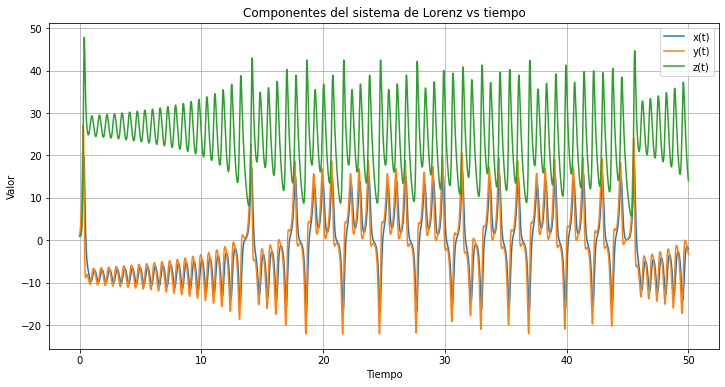

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Par√°metros cl√°sicos del sistema de Lorenz
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

# Funci√≥n que define el sistema de Lorenz
def lorenz_system(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Condiciones iniciales y tiempo de integraci√≥n
initial_state = [1.0, 1.0, 1.0]  # Caso 1
t = np.linspace(0, 50, 10000)

# Resolver el sistema
solution = odeint(lorenz_system, initial_state, t)

# Gr√°fica 3D del atractor
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], lw=0.5)
ax.set_title("Atractor de Lorenz")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# Gr√°ficas de x, y, z vs tiempo
plt.figure(figsize=(12, 6))
plt.plot(t, solution[:, 0], label='x(t)')
plt.plot(t, solution[:, 1], label='y(t)')
plt.plot(t, solution[:, 2], label='z(t)')
plt.title("Componentes del sistema de Lorenz vs tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()